### Data Description:

- `Date`: Date of Bitcoin prices

- `Open`: Opening price of Bitcoin on that day

- `High`: Highest price of Bitcoin on that day

- `Low`: Lowest price of Bitcoin on that day

- `Close`: Closing price of Bitcoin on that day

- `Volume`: Trading volume of Bitcoin on that day

- `Market Cap`: Market capitalization of Bitcoin on that day

In [2]:
# to manupulate and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# to supress warnings
import warnings
warnings.filterwarnings("ignore")

# to see full columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# creating dummy bitcoin dataset of 60 days  
date=pd.date_range(start='2023-08-01', periods=60)
open=np.random.uniform(150, 160, 60)
high=np.random.uniform(155, 165, 60)
low=np.random.uniform(145, 155, 60)
close=np.random.uniform(150, 160, 60)
volume=np.random.uniform(1500000, 2000000, 60)
market_cap= np.random.uniform(14000000, 18000000, 60)


In [4]:
# creating dataset
data=pd.DataFrame({
      'Date': date,
      'Open': open,
      'High': high,
      'Low': low,
      'Close': close,
      'Volume': volume,
      'Market Cap': market_cap
     })

In [5]:
# copying data
df = data.copy()

In [6]:
# checking top 5 rows
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2023-08-01,156.251632,157.911668,153.751906,156.811878,1.618730e+06,1.637952e+07
1,2023-08-02,156.010949,156.413899,154.056641,159.783971,1.836987e+06,1.672716e+07
2,2023-08-03,155.865994,157.318084,150.643847,158.721080,1.607739e+06,1.693727e+07
3,2023-08-04,152.164953,161.861220,148.729392,150.200846,1.929643e+06,1.635802e+07
4,2023-08-05,154.058163,160.148813,150.702822,157.080538,1.553675e+06,1.516250e+07


In [7]:
# checking the shape of data
df.shape

(60, 7)

- there are 60 rows and 7 columns.

In [9]:
# checking Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        60 non-null     datetime64[ns]
 1   Open        60 non-null     float64       
 2   High        60 non-null     float64       
 3   Low         60 non-null     float64       
 4   Close       60 non-null     float64       
 5   Volume      60 non-null     float64       
 6   Market Cap  60 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.4 KB


- Date feature is datetime and rest of the feature is float.

## Exploratory Data Analysis (EDA)

In [12]:
# checking statical summary
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,60,2023-08-30 12:00:00,2023-08-01 00:00:00,2023-08-15 18:00:00,2023-08-30 12:00:00,2023-09-14 06:00:00,2023-09-29 00:00:00,NaN
Open,60.0,154.824117,150.035073,152.485435,155.237864,156.813449,159.812426,2.769242
High,60.0,159.696725,155.015444,157.685892,159.381985,161.933801,164.863796,2.726816
Low,60.0,149.935674,145.065849,147.262697,150.475425,152.282206,154.845009,2.912002
Close,60.0,155.810807,150.053258,153.994309,156.076037,158.130918,159.89945,2.794745
Volume,60.0,1746566.224248,1502742.064007,1636174.069927,1739374.887172,1843765.952203,1969402.73225,131184.673784
Market Cap,60.0,16181308.330933,14098897.359813,15139388.834641,16368767.563019,17276525.501478,17966751.734159,1188128.450926


- Date start from 2023-08-01 00:00:00 to 2023-09-29 00:00:00.
- Market opening price average is 155, min. around 150, max. is around 160, std is around 2.9.
- Market High price is around 159, min. is around 155, max. is around 164, std. is around 2.8.
- Market low price average is around 150, min. is around 145, max. is around 154, std is around 2.9 .
- market closing price average around 155, min. is around 150, max. is around 159, std is around 2.9 .
- volume price average is around 1769995, min. around 1509236, max. around 1978200, std. is around 1035586

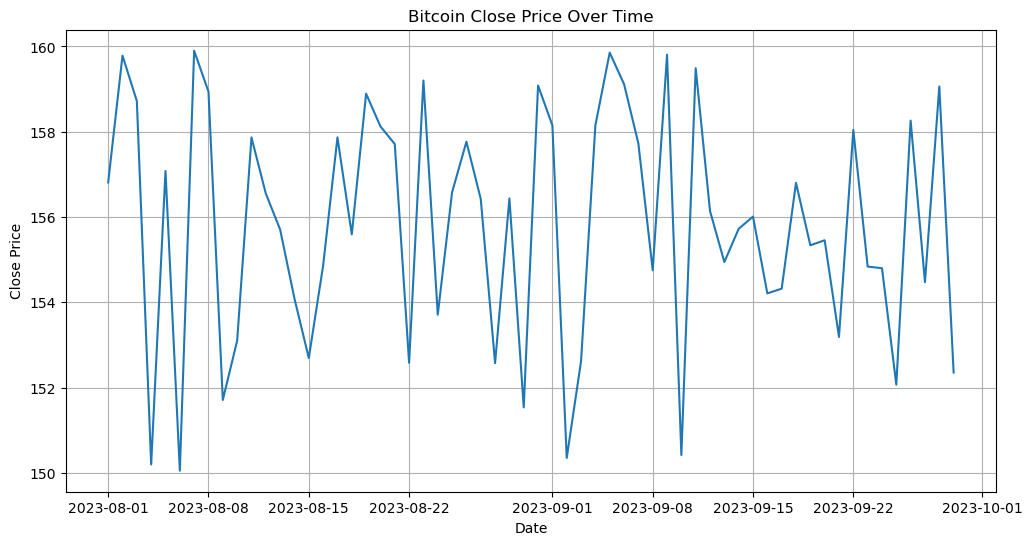

In [14]:
# checking time series of the close price of Bitcoin.
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

- from 1 August 2023 to 1 October 2023. The close price fluctuates significantly.
- The close price ranges approximately between 152 and 160.
- it shows that it can increase and decrease in short time.

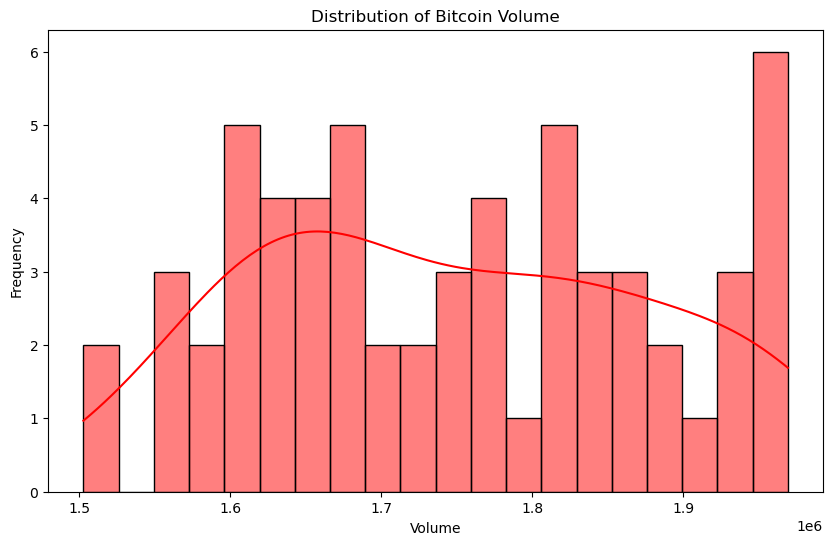

In [16]:
# checking the distribution of the Volume.
plt.figure(figsize=(10, 6))
sns.histplot(df['Volume'], bins=20, kde=True,color="r")
plt.title('Distribution of Bitcoin Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


- The transaction volumes range from 1.5 to 2.0.
- These peaks suggest that these are the most common transaction sizes during the sampled period.

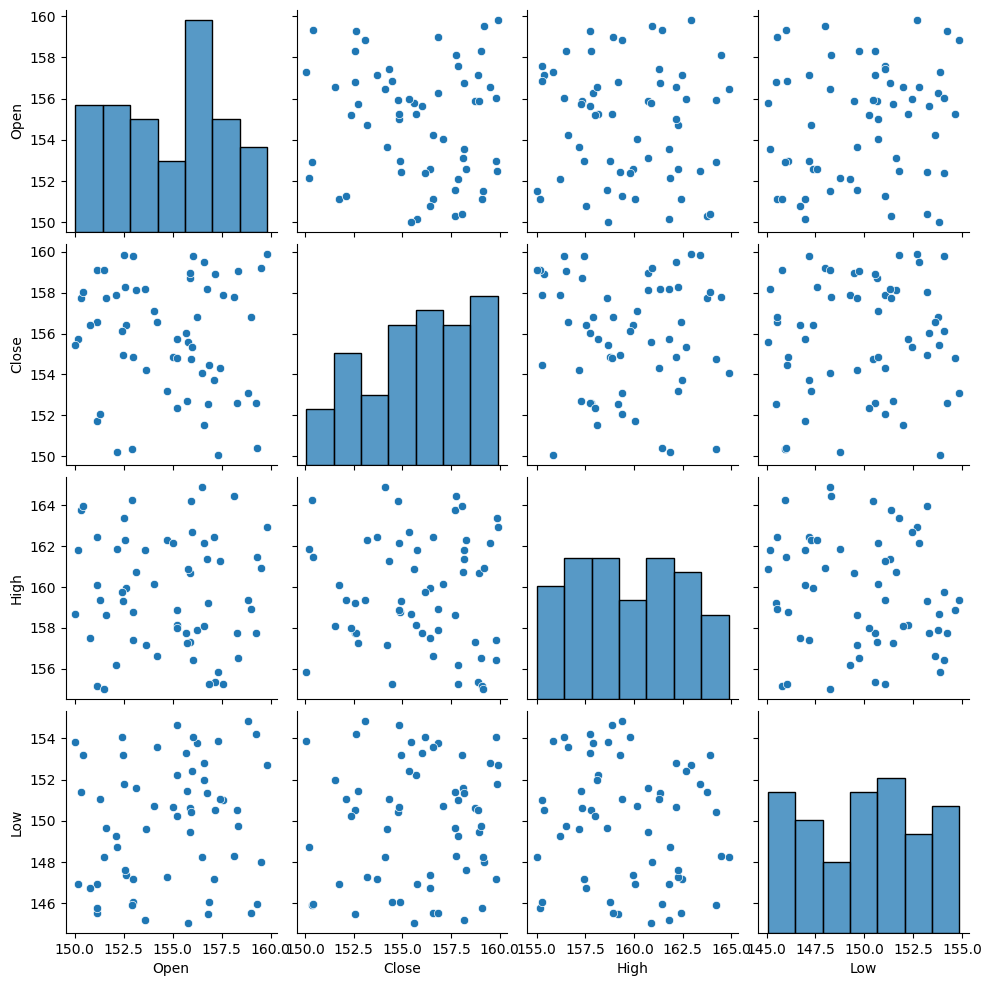

In [18]:
# Createing a pair plot to show the relationship between open, close, high, and low.
sns.pairplot(df[['Open', 'Close', 'High', 'Low']])
plt.show()

- there are no strong corelations between open, close, high,low.

            Open      High       Low     Close    Volume
Open    1.000000 -0.062958  0.146146 -0.097567  0.062349
High   -0.062958  1.000000 -0.142617 -0.059067 -0.067044
Low     0.146146 -0.142617  1.000000  0.054211 -0.061698
Close  -0.097567 -0.059067  0.054211  1.000000 -0.264576
Volume  0.062349 -0.067044 -0.061698 -0.264576  1.000000


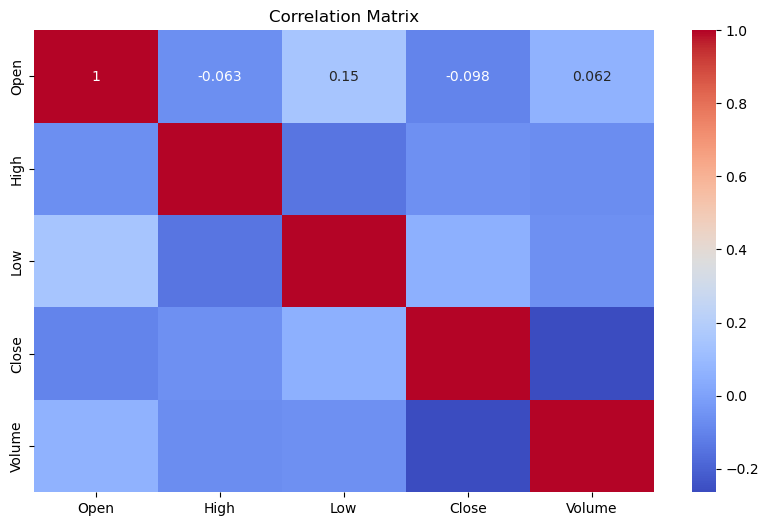

In [20]:
# checking coreleation between features
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- there is coreleation between open and close, volume and low. but there is no strong coreleations between features.

In [22]:
# checking positive gain
positive_gain_df = df[df['Close'] > df['Open']]
positive_gain_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2023-08-01,156.251632,157.911668,153.751906,156.811878,1.618730e+06,1.637952e+07
1,2023-08-02,156.010949,156.413899,154.056641,159.783971,1.836987e+06,1.672716e+07
2,2023-08-03,155.865994,157.318084,150.643847,158.721080,1.607739e+06,1.693727e+07
4,2023-08-05,154.058163,160.148813,150.702822,157.080538,1.553675e+06,1.516250e+07
6,2023-08-07,159.812426,162.945927,152.704985,159.899450,1.584701e+06,1.576811e+07


In [23]:
# checking trading volume is higher then the average trading volume
average_volume = df['Volume'].mean()
high_volume_df = df[df['Volume'] > average_volume]
high_volume_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
1,2023-08-02,156.010949,156.413899,154.056641,159.783971,1.836987e+06,1.672716e+07
3,2023-08-04,152.164953,161.861220,148.729392,150.200846,1.929643e+06,1.635802e+07
5,2023-08-06,157.304592,155.828162,153.871257,150.053258,1.816418e+06,1.670535e+07
7,2023-08-08,155.874643,160.696811,149.474567,158.939524,1.967184e+06,1.796675e+07
9,2023-08-10,158.848855,159.380912,154.845009,153.099033,1.837332e+06,1.702284e+07


In [24]:
# checking daily price difference between open and close and adding new feature.
price_change = []
for index, row in df.iterrows():
  change = row['Close'] - row['Open']
  price_change.append(change)
df['Price Change'] = price_change
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Price Change
0,2023-08-01,156.251632,157.911668,153.751906,156.811878,1.618730e+06,1.637952e+07,0.560246
1,2023-08-02,156.010949,156.413899,154.056641,159.783971,1.836987e+06,1.672716e+07,3.773022
2,2023-08-03,155.865994,157.318084,150.643847,158.721080,1.607739e+06,1.693727e+07,2.855085
3,2023-08-04,152.164953,161.861220,148.729392,150.200846,1.929643e+06,1.635802e+07,-1.964107
4,2023-08-05,154.058163,160.148813,150.702822,157.080538,1.553675e+06,1.516250e+07,3.022375


In [26]:
# adding new feature if the close price is higher then the open price as up otherwise down
price_trend = []
for index, row in df.iterrows():
  if row['Close'] > row['Open']:
    price_trend.append("Up")
  else:
    price_trend.append("Down")

df['Price Trend'] = price_trend
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Price Change,Price Trend
0,2023-08-01,156.251632,157.911668,153.751906,156.811878,1.618730e+06,1.637952e+07,0.560246,Up
1,2023-08-02,156.010949,156.413899,154.056641,159.783971,1.836987e+06,1.672716e+07,3.773022,Up
2,2023-08-03,155.865994,157.318084,150.643847,158.721080,1.607739e+06,1.693727e+07,2.855085,Up
3,2023-08-04,152.164953,161.861220,148.729392,150.200846,1.929643e+06,1.635802e+07,-1.964107,Down
4,2023-08-05,154.058163,160.148813,150.702822,157.080538,1.553675e+06,1.516250e+07,3.022375,Up


-----------------------------------------------------------THE END------------------------------------------------------------------------